# Remuestreo de imágenes de calidad

# Parte #1: Low-Pass Filter

### Introducción
Un filtro de paso bajo (Low-Pass Filter) es una técnica utilizada en visión artificial para obtener una image borrosa o para almacenar una imagen en menos espacio. Un filtro de paso bajo se puede aplicar solo en la Transformada de Fourier de una imagen (imagen de dominio de frecuencia) en lugar de la imagen original (Imagen de diminio espacial). Después de aplicarle un filtro de paso bajo, la imagen de dominio de frecuencia filtrada se restaura en una imagen de píxeles, que es una versión borosa de la imagen original.

<img src="./Resources/low-pass.png">

En realidad, un filtro de paso bajo es solo una imagen en escala de grises, cuyos valores son más altos cerca del centro y cerca de cero en el exterior. Por lo tanto, los filtros de paso bajo suelen tener el aspecto de la siguiente imagen. Este es uno de los filtros más populares llamado 'ventana de Hamming'.

<img src="./Resources/hamming.jpeg">


### Implementación en python

Acá podemos usar cualquier imagen, primero vamos a importar las librerías openCV y numpy. Luego cargamos la imagen que queremos.

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
img_path = './Resources/street.jpg'
img = cv2.imread(img_path)[:,:,0] # gray-scale image
img = img[:700, :700] # crop to 700 x 700 

Primero tomamos un canal de color y lo recortamos generando una imagen cuadrada en escala de grises. Luego, una ventana de Hamming se define con un parámetro 'r'. Este valor especifica qué tan pequeña es la ventana. Cuanto mayor sea este valor, más borrosa será la imagen filtrada.

In [8]:
r = 50 # how narrower the window is
ham = np.hamming(700)[:,None] # 1D hamming
ham2d = np.sqrt(np.dot(ham, ham.T)) ** r # expand to 2D hamming

Luego aplicamos la Transformada de Fourier en la imagen con opencv. La salida de esta función es un conjunto numérico de dos canales, que son parte imaginaria y real respectivamente. La ventana de Hamming (filtro) se aplica simplemente multiplicándola por la versión compleja de la imagen transformada.

In [10]:
f = cv2.dft(img.astype(np.float32), flags = cv2.DFT_COMPLEX_OUTPUT)
f_shifted = np.fft.fftshift(f)
f_complex = f_shifted[: ,: ,0] * 1j + f_shifted[:, :, 1]
f_filtered = ham2d * f_complex

No olvide convertir el tipo de datos de la imagen en flotante de 32 bits, de lo contrario, la función no funciona.
Dado que el centro de la imagen no coincide con el origen, tenemos que manejar este problema con la función np.fft.fftshift (). Lo que hace esta función es simplemente dividir una imagen en cuatro imágenes pequeñas y luego reorganizarlas de manera que se vuelva simétrica con respecto al centro

In [12]:
f_filtered_shifted = np.fft.fftshift(f_filtered)
inv_img = np.fft.ifft2(f_filtered_shifted) # inverse F.T.
filtered_img = np.abs(inv_img)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)



&lt;matplotlib.image.AxesImage at 0x5915520&gt;

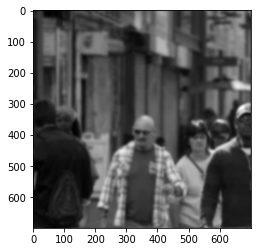

In [14]:
filtered_img = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB)
plt.imshow(filtered_img)